```
-- SELECT COUNT(license), license from [bigquery-public-data:github_repos.licenses] GROUP BY license
-- SELECT COUNT(DISTINCT license) from [bigquery-public-data:github_repos.licenses]
-- SELECT COUNT(*) from [bigquery-public-data:github_repos.licenses]
-- SELECT license , language.name from [bigquery-public-data:github_repos.licenses] li JOIN [bigquery-public-data:github_repos.languages] la on li.repo_name==la.repo_name 
-- SELECT COUNT(DISTINCT license) from [test_githubdata.la_li] 
-- SELECT COUNT(DISTINCT language_name ) from [test_githubdata.la_li]
-- SELECT  language_name from [test_githubdata.la_li] GROUP BY language_name ORDER BY language_name 
-- SELECT COUNT(license)as aggregate_count, license, language_name  from [test_githubdata.la_li] WHERE language_name IN ('Objective-C', 'Python','PHP','C','C++','C#','Java','JavaScript','TypeScript', 'Scala', 'Swift','Go','Ruby', 'Shell') GROUP BY language_name, license
```

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
distinct_licenses = pd.read_csv("lincesne_distinct.csv")

In [3]:
distinct_licenses.head(2)

,f0_,license
0,9145,artistic-2.0
1,18191,isc


In [4]:
distinct_licenses.rename(columns={'f0_':'count'}, inplace=True)

In [5]:
distinct_licenses.head(2)

,count,license
0,9145,artistic-2.0
1,18191,isc


In [6]:
distinct_licenses.sort_values('count', inplace=True, ascending=False)

In [7]:
distinct_licenses.head()

,count,license
2,1695303,mit
12,491337,apache-2.0
5,364738,gpl-2.0
6,333865,gpl-3.0
14,163985,bsd-3-clause


In [9]:
distinct_licenses.tail()

,count,license
4,24875,epl-1.0
9,24114,lgpl-2.1
7,18905,mpl-2.0
1,18191,isc
0,9145,artistic-2.0


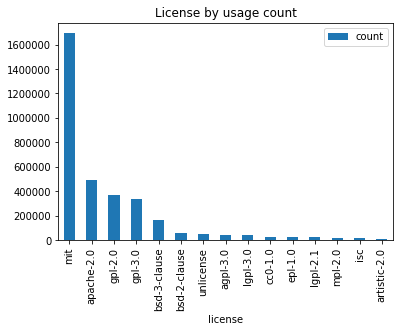

In [8]:
distinct_licenses.plot(x="license",y="count", kind="bar", title="License by usage count")

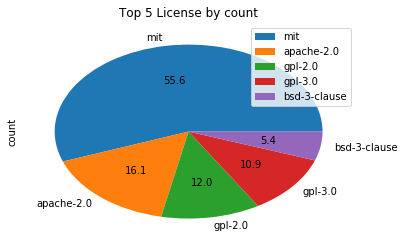

In [10]:
distinct_licenses[:5].plot(y="count", kind="pie", title="Top 5 License by count", autopct='%.1f',labels=distinct_licenses["license"][:5])

In [11]:
total_repo_count=3359866

In [12]:
assert total_repo_count == sum(distinct_licenses['count'])

In [13]:
distinct_licenses['percentage_usage']=distinct_licenses['count']/total_repo_count

In [14]:
distinct_licenses.head()

,count,license,percentage_usage
2,1695303,mit,0.504575
12,491337,apache-2.0,0.146237
5,364738,gpl-2.0,0.108557
6,333865,gpl-3.0,0.099369
14,163985,bsd-3-clause,0.048807


In [15]:
list(distinct_licenses['license'])

['mit',
 'apache-2.0',
 'gpl-2.0',
 'gpl-3.0',
 'bsd-3-clause',
 'bsd-2-clause',
 'unlicense',
 'agpl-3.0',
 'lgpl-3.0',
 'cc0-1.0',
 'epl-1.0',
 'lgpl-2.1',
 'mpl-2.0',
 'isc',
 'artistic-2.0']

In [16]:
license_family={}

In [17]:
license_family['mit']=distinct_licenses.loc[distinct_licenses['license'] == 'mit', 'count'].iloc[0]
license_family['unlicense']=distinct_licenses.loc[distinct_licenses['license'] == 'unlicense', 'count'].iloc[0]
license_family['cc']=distinct_licenses.loc[distinct_licenses['license'] == 'cc0-1.0', 'count'].iloc[0]
license_family['epl']=distinct_licenses.loc[distinct_licenses['license'] == 'epl-1.0', 'count'].iloc[0]
license_family['mpl']=distinct_licenses.loc[distinct_licenses['license'] == 'mpl-2.0', 'count'].iloc[0]
license_family['isc']=distinct_licenses.loc[distinct_licenses['license'] == 'isc', 'count'].iloc[0]
license_family['artistic']=distinct_licenses.loc[distinct_licenses['license'] == 'artistic-2.0', 'count'].iloc[0]
license_family['apache']=distinct_licenses.loc[distinct_licenses['license'] == 'apache-2.0', 'count'].iloc[0]

In [18]:
license_family['gnu']={}
license_family['gnu']['gpl']=distinct_licenses.loc[distinct_licenses['license'] == 'gpl-2.0','count'].iloc[0] +distinct_licenses.loc[distinct_licenses['license'] == 'gpl-3.0','count'].iloc[0]
license_family['gnu']['agpl']=distinct_licenses.loc[distinct_licenses['license'] == 'agpl-3.0','count'].iloc[0]
license_family['gnu']['lgpl']=distinct_licenses.loc[distinct_licenses['license'] == 'lgpl-2.1','count'].iloc[0] +distinct_licenses.loc[distinct_licenses['license'] == 'lgpl-3.0','count'].iloc[0]

In [19]:
license_family['bds']=distinct_licenses.loc[distinct_licenses['license'] == 'bsd-3-clause','count'].iloc[0] +distinct_licenses.loc[distinct_licenses['license'] == 'bsd-2-clause','count'].iloc[0]

In [20]:
license_family

{'apache': 491337,
 'artistic': 9145,
 'bds': 222303,
 'cc': 28269,
 'epl': 24875,
 'gnu': {'agpl': 41860, 'gpl': 698603, 'lgpl': 64267},
 'isc': 18191,
 'mit': 1695303,
 'mpl': 18905,
 'unlicense': 46808}

In [21]:
def dict_license_sum(dict_,sum_):
    for value in dict_.values():
        if type(value)==dict:
            sum_ += dict_sum(value,0)
        else:
            sum_+= value
    return sum_        

In [22]:
sum_=dict_license_sum(license_family['gnu'],0)

In [23]:
assert sum_ == 698603+64267+41860

In [24]:
license_family['gnu']=sum_

In [25]:
license_family

{'apache': 491337,
 'artistic': 9145,
 'bds': 222303,
 'cc': 28269,
 'epl': 24875,
 'gnu': 804730,
 'isc': 18191,
 'mit': 1695303,
 'mpl': 18905,
 'unlicense': 46808}

In [26]:
license_family=pd.DataFrame(license_family.items(), columns=['license_family','aggregate_count'])

In [27]:
license_family.sort_values('aggregate_count', inplace=True, ascending=False)

In [28]:
license_family

,license_family,aggregate_count
9,mit,1695303
0,gnu,804730
4,apache,491337
7,bds,222303
3,unlicense,46808
1,cc,28269
5,epl,24875
2,mpl,18905
8,isc,18191
6,artistic,9145


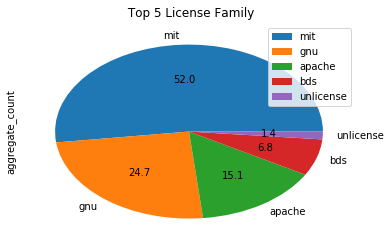

In [29]:
license_family[:5].plot(y="aggregate_count", kind="pie", title=" Top 5 License Family", autopct='%.1f',labels=license_family["license_family"][:5])

In [30]:
##part2

In [31]:
lang_license = pd.read_csv("all_top_lang.csv")

In [32]:
lang_license.head()

,aggregate_count,license,language_name
0,279,isc,TypeScript
1,20,artistic-2.0,TypeScript
2,78,isc,Swift
3,40,isc,Scala
4,51,artistic-2.0,Scala


In [33]:
lang_license['count_max']=lang_license.groupby(['language_name'], sort=False)['aggregate_count'].transform('max')

In [34]:
lang_license[lang_license.aggregate_count == lang_license.count_max]

,aggregate_count,license,language_name,count_max
28,31117,mit,Swift,31117
29,27035,mit,TypeScript,27035
31,83499,mit,C,83499
32,69958,mit,C#,69958
33,43187,mit,Go,43187
34,81935,mit,C++,81935
35,162346,mit,PHP,162346
37,270535,mit,Ruby,270535
38,241283,mit,Shell,241283
39,201001,mit,Python,201001


In [36]:
lang_license['count_min']=lang_license.groupby(['language_name'], sort=False)['aggregate_count'].transform('min')
lang_license[lang_license.aggregate_count == lang_license.count_min]

,aggregate_count,license,language_name,count_max,count_min
1,20,artistic-2.0,TypeScript,27035,20
3,40,isc,Scala,13555,40
7,477,artistic-2.0,C,83499,477
8,210,artistic-2.0,C#,69958,210
11,50,artistic-2.0,Go,43187,50
13,402,artistic-2.0,C++,81935,402
16,571,artistic-2.0,Java,147377,571
19,278,artistic-2.0,Ruby,270535,278
20,918,artistic-2.0,Shell,241283,918
23,605,artistic-2.0,Python,201001,605
